<h2 style="color: crimson;"> Phân tích Doanh số Bán hàng (2020–2024)</h2>

## Mục tiêu:
Phân tích dữ liệu bán hàng theo sản phẩm, khu vực và thời gian để:
1. Phân tích dữ liệu để tìm ra các xu hướng doanh số theo thời gian.
2. Xác định các sản phẩm bán chạy nhất và khu vực có doanh số cao nhất.
3. Đưa ra các khuyến nghị để cải thiện doanh số bán hàng dựa trên phân tích của bạn.

In [1]:
import pandas as pd
df = pd.read_csv(r'D:\Test_Dataset.csv')
df.head()

,Ngày Bán Hàng,Sản Phẩm,Số Lượng,Giá Bán,Khu Vực,Doanh Thu
0,2023-06-17,Sản phẩm E,18,27,Miền Tây,486
1,2023-10-15,Sản phẩm E,36,99,Miền Tây,3564
2,2024-02-10,Sản phẩm C,40,83,Miền Trung,3320
3,2021-07-16,Sản phẩm E,38,38,Miền Đông,1444
4,2020-06-12,Sản phẩm A,17,21,Miền Nam,357


<h2 style="color: crimson;"> Hiển thị dữ liệu</h2>

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399 entries, 0 to 398
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Ngày Bán Hàng  399 non-null    object
 1   Sản Phẩm       399 non-null    object
 2   Số Lượng       399 non-null    int64 
 3   Giá Bán        399 non-null    int64 
 4   Khu Vực        399 non-null    object
 5   Doanh Thu      399 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 18.8+ KB


In [3]:
df.isnull().sum()

Ngày Bán Hàng    0
Sản Phẩm         0
Số Lượng         0
Giá Bán          0
Khu Vực          0
Doanh Thu        0
dtype: int64

In [62]:
len(df)

399

<h2 style="color:#cc0000;">  Kiểm tra thông tin dữ liệu</h2>

Dữ liệu gồm 399 dòng và 6 cột, không có giá trị null. Cột `Ngày Bán Hàng` hiện ở dạng `object`, cần chuyển sang `datetime` để thuận tiện phân tích theo thời gian.


In [4]:
df['Ngày Bán Hàng'] = pd.to_datetime(df['Ngày Bán Hàng'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399 entries, 0 to 398
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Ngày Bán Hàng  399 non-null    datetime64[ns]
 1   Sản Phẩm       399 non-null    object        
 2   Số Lượng       399 non-null    int64         
 3   Giá Bán        399 non-null    int64         
 4   Khu Vực        399 non-null    object        
 5   Doanh Thu      399 non-null    int64         
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 18.8+ KB


In [5]:
df['Tháng'] = df['Ngày Bán Hàng'].dt.month
df['Ngày Trong Tuần'] = df['Ngày Bán Hàng'].dt.dayofweek
df['Quý'] = df['Ngày Bán Hàng'].dt.quarter
df['Năm'] = df['Ngày Bán Hàng'].dt.year
df.head(10)

,Ngày Bán Hàng,Sản Phẩm,Số Lượng,Giá Bán,Khu Vực,Doanh Thu,Tháng,Ngày Trong Tuần,Quý,Năm
0,2023-06-17,Sản phẩm E,18,27,Miền Tây,486,6,5,2,2023
1,2023-10-15,Sản phẩm E,36,99,Miền Tây,3564,10,6,4,2023
2,2024-02-10,Sản phẩm C,40,83,Miền Trung,3320,2,5,1,2024
3,2021-07-16,Sản phẩm E,38,38,Miền Đông,1444,7,4,3,2021
4,2020-06-12,Sản phẩm A,17,21,Miền Nam,357,6,4,2,2020
5,2022-06-01,Sản phẩm D,18,12,Miền Đông,216,6,2,2,2022
6,2023-08-19,Sản phẩm E,31,70,Miền Tây,2170,8,5,3,2023
7,2020-01-26,Sản phẩm B,27,13,Miền Bắc,351,1,6,1,2020
8,2020-04-23,Sản phẩm E,33,21,Miền Đông,693,4,3,2,2020
9,2020-12-16,Sản phẩm D,16,17,Miền Đông,272,12,2,4,2020


<h2 style="color:#cc0000;">  Chuyển đổi kiểu dữ liệu</h2>

Cột `Ngày Bán Hàng` đã được chuyển thành kiểu `datetime`, cho phép trích xuất thông tin theo `tháng`,`ngày trong tuần`, `quý`, `năm` để phục vụ phân tích chuỗi thời gian.


In [6]:
df.describe()

,Ngày Bán Hàng,Số Lượng,Giá Bán,Doanh Thu,Tháng,Ngày Trong Tuần,Quý,Năm
count,399,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000
mean,2022-08-07 14:58:38.796992512,28.160401,53.463659,1525.320802,6.779449,2.939850,2.573935,2022.077694
min,2020-01-07 00:00:00,5.000000,10.000000,75.000000,1.000000,0.000000,1.000000,2020.000000
25%,2021-06-13 00:00:00,16.500000,32.000000,606.500000,4.000000,1.000000,2.000000,2021.000000
50%,2022-08-25 00:00:00,29.000000,53.000000,1302.000000,7.000000,3.000000,3.000000,2022.000000
75%,2023-09-28 00:00:00,41.000000,76.000000,2191.500000,10.000000,5.000000,4.000000,2023.000000
max,2024-12-29 00:00:00,50.000000,100.000000,4704.000000,12.000000,6.000000,4.000000,2024.000000
std,NaN,13.890973,25.475341,1112.566688,3.416113,2.024074,1.097701,1.387843


In [7]:
import numpy as np
df.describe(include='object')

,Sản Phẩm,Khu Vực
count,399,399
unique,5,5
top,Sản phẩm E,Miền Trung
freq,85,83


<h2 style="color:#cc0000;"> Tổng quan thống kê dữ liệu số</h2>

Tập dữ liệu gồm <strong>399 giao dịch</strong> từ năm <strong>2020 đến 2024</strong>.

<ul>
  <li><strong>Số lượng sản phẩm bán ra</strong> trung bình mỗi giao dịch: <strong>28.16</strong>, độ lệch chuẩn khá cao → cho thấy phân phối không đồng đều.</li>
  <li><strong>Giá bán</strong> dao động từ <strong>10 đến 100</strong>, với trung bình là <strong>53.46</strong> → mức giá trung bình tầm trung.</li>
  <li><strong>Doanh thu mỗi giao dịch</strong> trung bình là <strong>1,525</strong>, biến động từ <strong>75 đến 4,704</strong> .</li>
  <li><strong>Ngày trong tuần bán nhiều nhất</strong> là <strong>số 6</strong> (Chủ nhật).</li>
  <li><strong>Quý cao nhất</strong> là <strong>quý 4</strong>, thấp nhất là <strong>quý 1</strong>.</li>
  <li><strong>Tháng bán nhiều nhất</strong>: 75% giao dịch xảy ra sau tháng 9 → có thể do yếu tố mùa vụ cuối năm.</li>
</ul>

---

<h2 style="color:#cc0000;"> Thống kê dữ liệu phân loại</h2>

<ul>
  <li>Có <strong>5 loại sản phẩm</strong>, <span style="color:#990000;"><strong>Sản phẩm E</strong></span> xuất hiện nhiều nhất (85 giao dịch) .</li>
  <li>Có <strong>5 khu vực</strong>, <span style="color:#990000;"><strong>Miền Trung</strong></span> chiếm nhiều nhất (83 giao dịch) → khu vực nổi bật.</li>
</ul>

---

<h2 style="color:#cc0000;"> Nhận xét</h2>

<blockquote style="color:#444;">
<strong>Cần tiếp tục phân tích các yếu tố ảnh hưởng đến doanh thu</strong>, đặc biệt là <span style="color:#cc0000;"><strong>Sản phẩm E</strong></span> và <span style="color:#cc0000;"><strong>Miền Trung</strong></span> – 2 yếu tố đang chiếm tỷ trọng lớn nhất trong dữ liệu.
</blockquote>


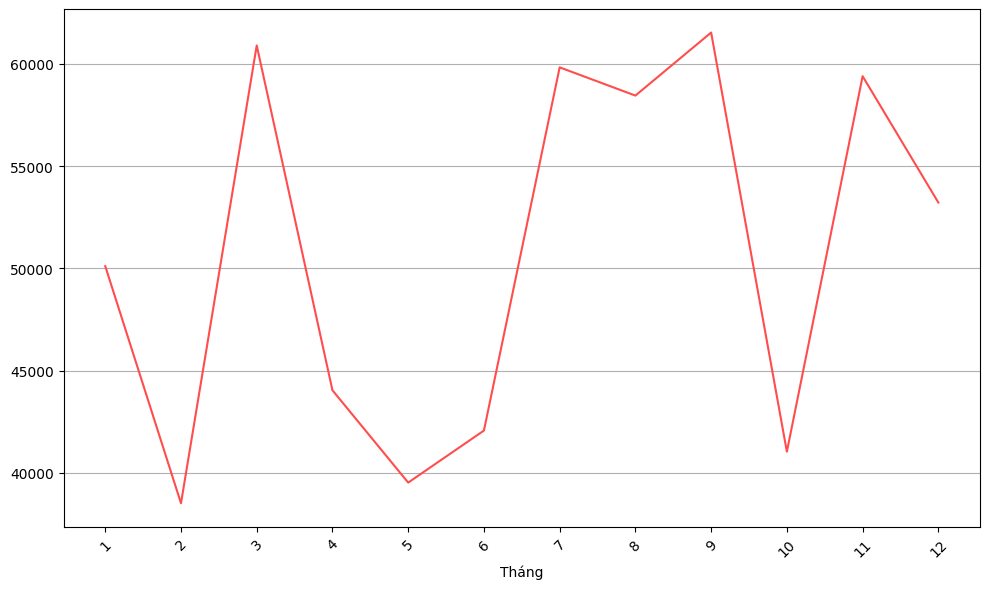

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns
monthly_sales = df.groupby('Tháng')['Doanh Thu'].sum()
monthly_sales.plot(kind = 'line', figsize = (10,6), color = '#ff4d4d')
plt.xlabel='Tháng'
plt.ylabel = 'Doanh thu'
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.xticks(ticks=range(1, 13))
plt.tight_layout()
plt.show()

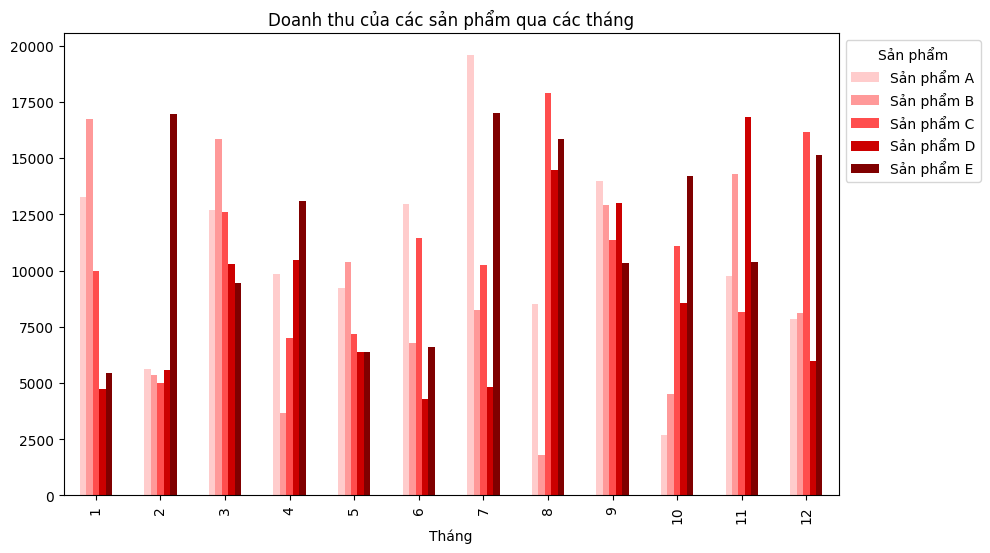

In [140]:
SalesItemByMonth = df.groupby(['Tháng','Sản Phẩm'])['Doanh Thu'].sum().unstack()
#Vẽ biểu đồ
colors = ['#ffcccc', '#ff9999', '#ff4d4d', '#cc0000', '#800000']
SalesItemByMonth.plot(kind='bar', figsize=(10, 6), color = colors)
#Đặt nhãn và tiêu đề
plt.xlabel = 'Tháng'
plt.ylabel='Doanh Thu'
plt.title('Doanh thu của các sản phẩm qua các tháng')
#Hiển thị biểu đồ
plt.legend(title='Sản phẩm', loc='upper left', bbox_to_anchor=(1, 1)) 
plt.show()

<h3 style="color:#cc0000;"> Phân tích doanh thu kết hợp tháng & sản phẩm</h3>

- Sản phẩm <strong>A</strong> và <strong>E</strong> tạo doanh thu đột biến vào <strong>tháng 3</strong> và <strong>tháng 11</strong> giúp cho các tháng này đạt doanh thu rất cao.
- Sản phẩm <strong>D</strong> bắt đầu tăng vào <strong>tháng 7</strong>, đây là sản phẩm mùa vụ
- Sản phẩm <strong>C</strong> duy trì mức doanh thu ổn định quanh năm.

→ <em>Các sản phẩm mang tính mùa vụ như A,E,D cần chuẩn bị trước và có các chiến dịch marketing phù hợp trước khi vào mùa vụ</em>

→ <em>Sản phẩm C cần có lượng hàng tồn kho an toàn, ổn định để duy trì doanh thu cho công ty</em>

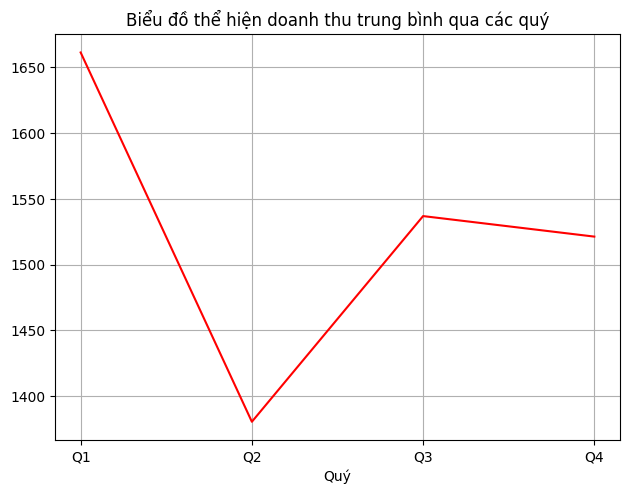

In [79]:
quarterly_sales = df.groupby('Quý')['Doanh Thu'].mean()
#Vẽ biểu đồ
ax = quarterly_sales.plot(kind = 'line',color = 'red')
plt.xlabel = ('Quý')
plt.ylabel = ('Doanh Thu')
#Thêm tên biểu đồ và hiển thị biểu đồ
plt.tight_layout()
plt.grid(True)
plt.xticks(ticks=[1, 2, 3, 4], labels=['Q1', 'Q2', 'Q3', 'Q4'])
plt.title('Biểu đồ thể hiện doanh thu trung bình qua các quý')
plt.show()


<h3 style="color:#cc0000;"> Nhận xét chi tiết theo quý</h3>

<b> Quý 1 – Doanh thu trung bình cao nhất</b>  
- Mặc dù tháng 2 trùng với dịp Tết Nguyên Đán khiến doanh thu thấp (do nghỉ lễ), doanh thu tăng mạnh vào tháng 3 khi thị trường trở lại hoạt động bình thường.
- Giai đoạn tháng 3 thường ghi nhận nhiều hoạt động khuyến mãi, chiến dịch “mở hàng đầu năm”,“lì xì nếu có các nhà phân phối”→ thúc đẩy doanh thu.
- Doanh nghiệp có thể đã tận dụng tâm lý “mua sắm trở lại” sau Tết.
- 

 <i><b>Đề xuất:</b> Tập trung chiến lược bán hàng vào tháng 3 – thời điểm thị trường phục hồi và sẵn sàng chi tiêu trở lại sau kỳ nghỉ dài.</i>


---

<b> Quý 2 – Doanh thu trung bình thấp nhất</b>  
- Sau dịp Tết, thị trường bắt đầu chậm lại → hành vi chi tiêu giảm.
- Có thể là giai đoạn “trũng” trong năm khi người tiêu dùng tiết chế chi tiêu.
- Thiếu các dịp lễ lớn để kích thích mua hàng.

 <i><b>Đề xuất:</b> Tập trung vào sản phẩm thiết yếu, duy trì doanh thu như sản phẩm C,tổ chức chương trình giảm giá giữa năm để giữ đà tăng trưởng.</i>

---

<b> Quý 3 – Doanh thu phục hồi mạnh</b>  
- Doanh thu trung bình tăng trở lại rõ rệt so với quý 2.
- Có thể liên quan đến mùa hè: du lịch, hoạt động ngoài trời, nghỉ hè của học sinh, sinh viên, tăng nhu cầu mua sắm trở lại sau kì nghỉ hè về quê, đi du lịch, không có thời gian mua sắm nhiều (trừ các mặt hàng phục vụ cho du lịch).
- Ngoài ra, đây cũng có thể là giai đoạn chuẩn bị “back-to-school” (mặc dù tùy ngành hàng).

 <i><b>Đề xuất:</b> Tận dụng xu hướng tiêu dùng mùa hè, tạo ra các chiến dịch marketing, đẩy mạnh các sản phẩm phù hợp với thời tiết hè.</i>

---

<b> Quý 4 – Ổn định nhưng thấp hơn kỳ vọng</b>  
- Dù là giai đoạn cuối năm, nhưng doanh thu trung bình lại không đạt đỉnh như Quý 1.
- Có thể do doanh thu dồn mạnh vào tháng 11 (Black Friday), nhưng tháng 10–12 còn lại thấp, tháng 12 là tháng "chạy số" của tất cả ngành hàng nhưng doanh thu vẫn thấp.
- Hoặc doanh nghiệp chưa tận dụng tối đa dịp lễ cuối năm.

 <i><b>Đề xuất:</b> Tăng cường các chương trình kích cầu mua sắm cuối năm như Noel, Tết Dương lịch, khuyến mãi combo.</i>

---

<h4 style="color:#cc0000;"> Tổng kết</h4>

- Quý 1 và Quý 3 là 2 thời điểm có doanh thu trung bình cao nhất → cần tối ưu ngân sách, nhân lực trong 2 quý này.
- Quý 2 là “điểm trũng” → cần chiến lược phù hợp để giữ thị phần, giảm thiểu tồn kho, giảm chi phí.
- Quý 4 là cơ hội lớn chưa được khai thác hết → nên đẩy mạnh chiến dịch dịp cuối năm, tập trung các mặt hàng phục vụ cho Tết Nguyên Đán (nếu có).


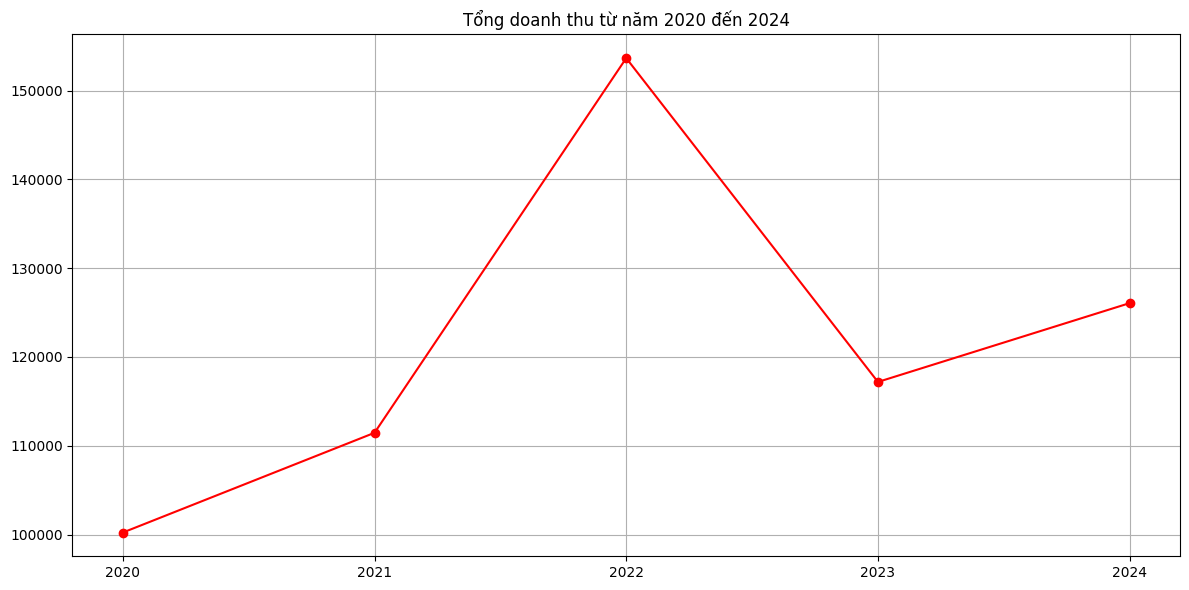

In [82]:
yearly_sales = df.groupby('Năm')['Doanh Thu'].sum()
# Vẽ biểu đồ
plt.figure(figsize=(12, 6))
plt.plot(yearly_sales.index, yearly_sales.values, marker='o', linestyle='-',color = 'red')

# Đặt nhãn và tiêu đề
plt.xlabel= "Năm"
plt.ylabel= "Doanh thu"
plt.title("Tổng doanh thu từ năm 2020 đến 2024")

# Định dạng trục x
plt.xticks(yearly_sales.index)

# Hiển thị biểu đồ
plt.grid(True)
plt.tight_layout()
plt.show()

<h3 style="color:#cc0000;"> Nhận xét về Doanh Thu Theo Năm</h3>

- **2020**:  
  Bùng dịch toàn cầu → lockdown → ảnh hưởng nặng nề đến doanh thu do sự bùng dịch quá đột ngột

- **2021**:  
  Doanh thu có cải thiện, tìm nhiều cách để cải thiện doanh thu, mặc dù vẫn còn nhiều hạn chế, doanh thu có sự cải thiện nhưng chưa ổn định.

- **2022**:  
  Hầu hết các quốc gia mở cửa trở lại, phục hồi kinh tế mạnh mẽ, dẫn đến sự tăng trưởng tiêu dùng mạnh mẽ và doanh thu đạt đỉnh cao nhất, người tiêu dùng sài tiền nhiều hơn do 1 khoảng thời gian dài chưa được sử dụng tiền.

- **2023**:  
  Kinh tế toàn cầu đối mặt với lạm phát, thắt chặt chi tiêu, doanh nghiệp bắt đầu giảm sụt giảm, doanh thu giảm mạnh khoảng 25%.

- **2024**:  
  Bước vào giai đoạn phục hồi, mặc dù chưa đạt mức cao nhất của năm 2022, nhưng có dấu hiệu phục hồi tích cực trong xu hướng dài hạn.

---



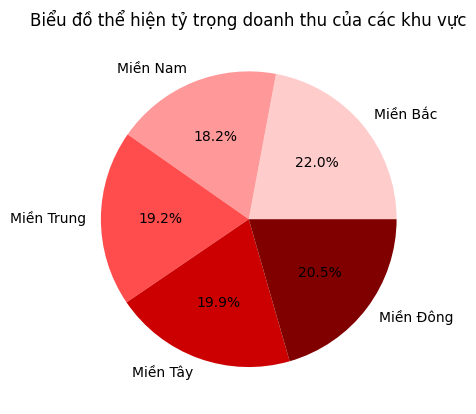

In [16]:
SalesbyRegion = df.groupby('Khu Vực')['Doanh Thu'].sum()
#Vẽ biểu đồ 1
colors = ['#ffcccc', '#ff9999', '#ff4d4d', '#cc0000', '#800000']
plt.pie(SalesbyRegion, labels=SalesbyRegion.index, autopct='%1.1f%%', colors=colors)
#Đặt tiêu đề
plt.title('Biểu đồ thể hiện tỷ trọng doanh thu của các khu vực')
#Hiển thị biểu đồ
plt.show()
                  


<h3 style="color:#cc0000;"> Nhận xét về Biểu Đồ Tỷ Trọng Doanh Thu Các Khu Vực</h3>

- **Miền Bắc** chiếm tỷ trọng lớn nhất, khoảng **22.0%** trong tổng doanh thu, cho thấy đây là khu vực có doanh thu cao nhất.

- **Miền Trung** chiếm khoảng **19.2%**, có mức doanh thu gần như tương đương với **Miền Tây** (19.9%). Đây là các khu vực có tỷ trọng doanh thu trung bình.

- **Miền Nam** chiếm tỷ trọng thấp nhất trong các khu vực với **18.2%**, cho thấy đây là khu vực có doanh thu ít nhất.
    
- **Miền Đông** chiếm tỷ trọng **20.5%**, là khu vực có doanh thu khá ổn định và không quá thấp so với các khu vực khác.

Tổng thể, có sự phân bổ tương đối đều giữa các khu vực, mặc dù **Miền Bắc** có mức doanh thu vượt trội so với các khu vực khác. 

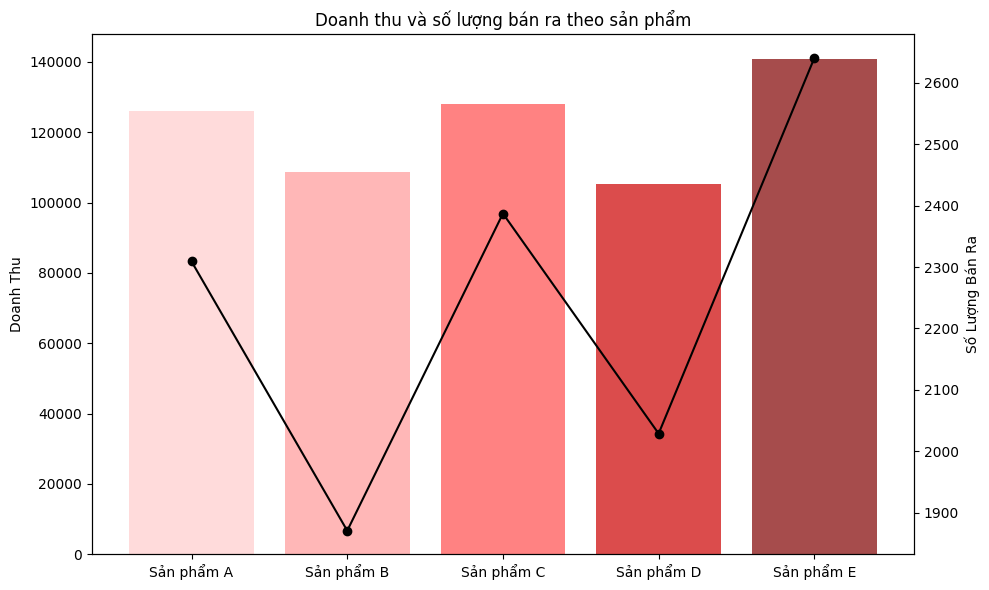

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

SalesbyItem = df.groupby('Sản Phẩm')['Doanh Thu'].sum()
QuantitybyItem = df.groupby('Sản Phẩm')['Số Lượng'].sum() 

# Vẽ biểu đồ
fig, ax1 = plt.subplots(figsize=(10,6))

# Cột Doanh thu (trục y bên trái)
colors = ['#ffcccc', '#ff9999', '#ff4d4d', '#cc0000', '#800000']
ax1.bar(SalesbyItem.index, SalesbyItem.values, color= colors, alpha=0.7)
ax1.set_ylabel('Doanh Thu', color='black')
ax1.tick_params(axis='y', labelcolor='black')

# Trục thứ hai cho số lượng (y bên phải)
ax2 = ax1.twinx()
ax2.plot(QuantitybyItem.index, QuantitybyItem.values, color='black', marker='o')
ax2.set_ylabel('Số Lượng Bán Ra', color='black')
ax2.tick_params(axis='y', labelcolor='black')

# Tiêu đề
plt.title('Doanh thu và số lượng bán ra theo sản phẩm')
plt.tight_layout()
plt.show()


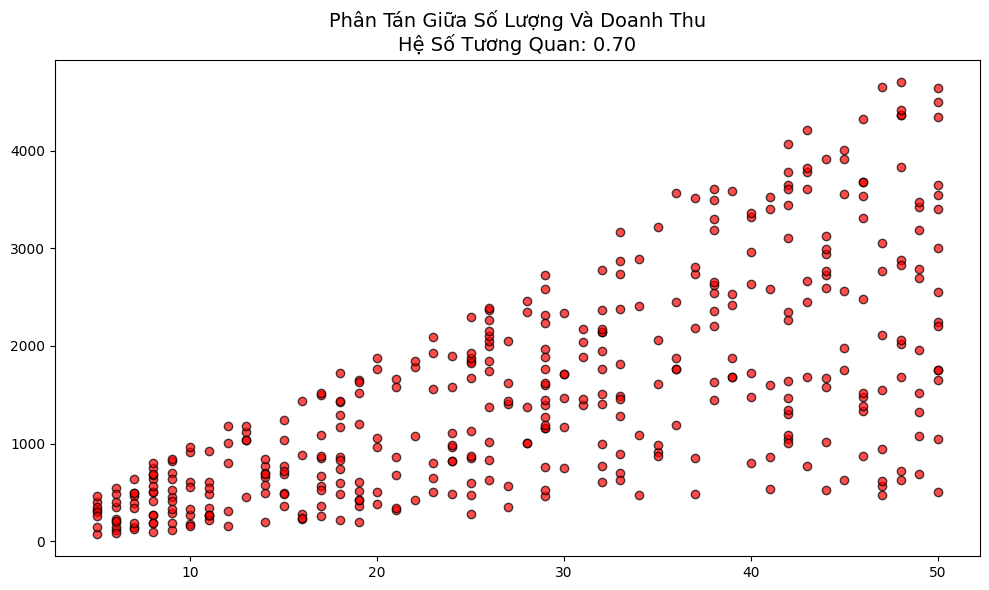

In [103]:
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Tính toán hệ số tương quan giữa Doanh Thu và Số Lượng
corr_coefficient, _ = pearsonr(df['Số Lượng'], df['Doanh Thu'])

# Vẽ biểu đồ scatter plot với các điểm màu đỏ
plt.figure(figsize=(10, 6))
plt.scatter(x=df['Số Lượng'], y=df['Doanh Thu'], color='red', alpha=0.7, edgecolor='black')

# Thêm tiêu đề và nhãn
plt.title(f'Phân Tán Giữa Số Lượng Và Doanh Thu\nHệ Số Tương Quan: {corr_coefficient:.2f}', fontsize=14)

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()



<h3 style="color:#cc0000;"> Nhận xét về mối Quan Hệ Giữa Doanh Thu và Số Lượng Bán Ra</h3>

Biểu đồ scatter plot cho thấy mối quan hệ liên quan nhiều giữa **Số Lượng Bán Ra** và **Doanh Thu**, với hệ số tương quan **0.70**. Điều này chỉ ra rằng khi số lượng bán ra tăng, doanh thu cũng tăng theo, cho thấy một sự phụ thuộc rõ ràng giữa hai yếu tố này.

Tuy nhiên, hệ số tương quan không phải là 1, điều này có nghĩa là vẫn có một số yếu tố khác (như chiến lược giá cả, các yếu tố địa chính trị, thời tiết, mùa vụ, đối thủ cạnh tranh, và chiến dịch marketing) có thể ảnh hưởng đến doanh thu mà không chỉ dựa vào số lượng bán ra.

<h3 style="color:#cc0000;">  Phân Tích Chi Tiết</h3>

- Các sản phẩm có lượng bán ra cao, như sản phẩm E, có thể đã được marketing đúng cách hoặc có chất lượng vượt trội, khiến số lượng bán ra cao và giúp tăng trưởng doanh thu.
- Sản phẩm có số lượng bán ra thấp, mặc dù có thể có mức giá cao, nhưng lại không đạt được doanh thu mong muốn.

--> Để tăng doanh thu, cần tìm cách nâng cao số lượng bán ra cho các sản phẩm có doanh thu thấp bằng cách áp dụng các chiến lược marketing, chương trình khuyến mãi, và tối ưu hóa chiến lược về giá, trước mắt tránh làm người tiêu dùng nhạy cảm về giá, ưu tiên về việc tăng số lượng bán ra.
<h3 style="color:#cc0000;">  Phân Tích Sự Khác Biệt Giữa Các Sản Phẩm</h3>

Dựa trên các biểu đồ, có thể nhận thấy rõ ràng sự khác biệt về hiệu suất bán hàng giữa các sản phẩm. **Sản phẩm E** không chỉ vượt trội về doanh thu mà còn có số lượng bán ra cao nhất, cho thấy đây là sản phẩm được thị trường ưa chuộng nhất.

Ngược lại, các sản phẩm **B** và **D** lại có doanh thu thấp và số lượng bán ra không đạt được như kỳ vọng, điều này có thể là dấu hiệu cho thấy sự cạnh tranh khốc liệt từ các sản phẩm thay thế hoặc đối thủ cạnh tranh.

<h3 style="color:#cc0000;">  Giải Pháp:</h3>

1. **Đẩy mạnh marketing cho sản phẩm E**: Với doanh thu cao và sự đón nhận từ thị trường, chúng ta có thể đẩy mạnh chiến lược quảng bá cho sản phẩm này để tối ưu hóa lợi nhuận.
2. **Xem xét sản phẩm A và C**: cần có chiến dịch marketing phù hợp với các sản phẩm này, có thể đưa ra các chiến dịch marketing đột phá hơn các đối thủ cạnh tranh.
3. **Khảo sát và nghiên cứu thêm về sản phẩm B và D**: Tìm ra lý do khiến chúng không bán chạy và đưa ra giải pháp cụ thể như cải thiện chất lượng, bổ sung tính năng mới hoặc thay đổi hình thức quảng bá.

<h3 style="color:#cc0000;">  Kết Luận:</h3>

Chúng ta cần tập trung vào việc tối ưu hóa hiệu quả bán hàng của sản phẩm E, đồng thời không bỏ qua cơ hội cải thiện và làm mới các sản phẩm khác như A, B, C và D.



In [74]:
abc = df.groupby('Sản Phẩm')['Doanh Thu'].sum().reset_index()
abc = abc.sort_values(by='Doanh Thu', ascending=False).reset_index(drop=True)
tong_doanh_thu = abc['Doanh Thu'].sum()
abc['Tỷ lệ %'] = 100 * abc['Doanh Thu'] / tong_doanh_thu
abc['Tỷ lệ cộng dồn %'] = abc['Tỷ lệ %'].cumsum()
def gán_nhóm(pct_cộng_dồn):
    if pct_cộng_dồn <= 70:
        return 'A'
    elif pct_cộng_dồn <= 90:
        return 'B'
    else:
        return 'C'

abc['Phân Nhóm'] = abc['Tỷ lệ cộng dồn %'].apply(gán_nhóm)
abc

,Sản Phẩm,Doanh Thu,Tỷ lệ %,Tỷ lệ cộng dồn %,Phân Nhóm
0,Sản phẩm E,140761,23.128542,23.128542,A
1,Sản phẩm C,127974,21.027501,44.156043,A
2,Sản phẩm A,125974,20.698879,64.854922,A
3,Sản phẩm B,108576,17.840201,82.695123,B
4,Sản phẩm D,105318,17.304877,100.000000,C


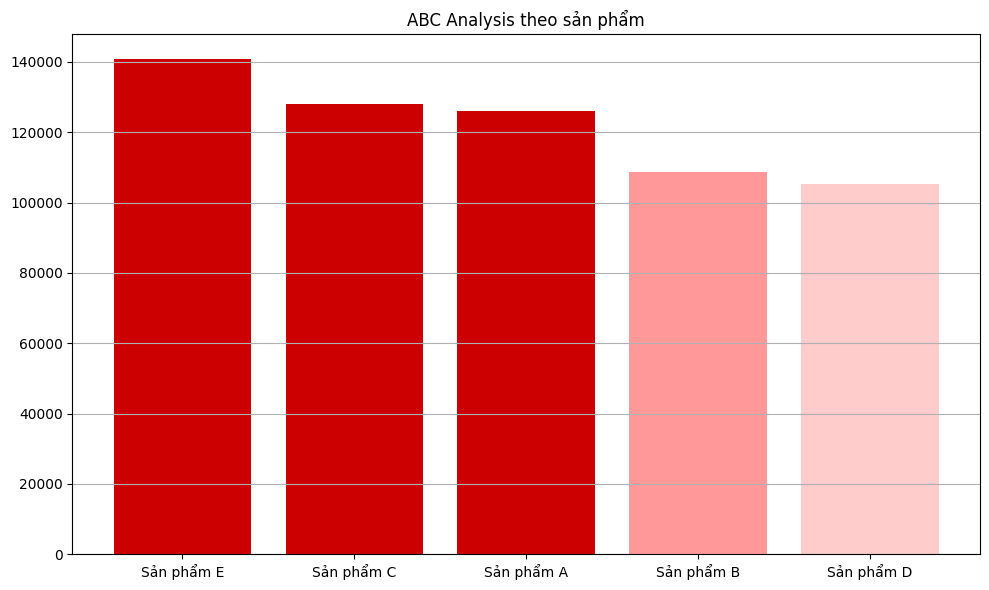

In [77]:
import matplotlib.pyplot as plt

colors = abc['Phân Nhóm'].map({'A':'#cc0000', 'B':'#ff9999', 'C':'#ffcccc'})

plt.figure(figsize=(10,6))
plt.bar(abc['Sản Phẩm'], abc['Doanh Thu'], color=colors)
plt.title('ABC Analysis theo sản phẩm')
plt.xlabel = 'Sản Phẩm'
plt.ylabel = 'Tổng Doanh Thu'
plt.grid(axis='y')
plt.tight_layout()
plt.show()



<h3 style="color:#cc0000;"> Nhận Xét về Phân Tích ABC Theo Sản Phẩm</h3>

Biểu đồ ABC Analysis cho thấy sự phân bổ doanh thu giữa các sản phẩm. Theo phân tích này, các sản phẩm **E, C, A** có mức doanh thu cao nhất, được thể hiện bằng các cột đỏ đậm. Điều này chứng tỏ những sản phẩm này chiếm phần lớn doanh thu và là nhóm **A** trong phân tích ABC, là nhóm có tầm quan trọng cao nhất đối với doanh thu.

Trong khi đó, **Sản phẩm B và D** có doanh thu thấp hơn, được thể hiện bằng màu đỏ nhạt, chỉ ra rằng đây là các sản phẩm thuộc nhóm **B** hoặc **C**, có tầm quan trọng thấp hơn so với các sản phẩm ở nhóm A.

<h3 style="color:#cc0000;">  Kết Luận và Đề Xuất</h3>

- **Sản phẩm E, C và A**: Đây là những sản phẩm chủ lực, có tầm quan trọng cao nhất, cần được tập trung vào việc duy trì và phát triển thêm doanh thu. Các chiến lược như marketing mạnh mẽ, khuyến mãi hoặc tăng cường tồn kho để đáp ứng kịp thời tới thị trường.
- **Sản phẩm B và D**: Cần đánh giá lại chiến lược đối với các sản phẩm này. Có thể xem xét việc cải tiến chất lượng, cải thiện hình thức quảng bá hoặc thay đổi giá bán để nâng cao sức cạnh tranh và doanh thu.

<h3 style="color:#cc0000;">Chiến Lược Đề Xuất</h3>
Tập trung phần lớn nguồn lực vào nhóm A (Sản phẩm E, C, A) trong khi tối ưu hóa và cải tiến nhóm B và C (Sản phẩm B, D) để duy trì sự ổn định và tăng trưởng lâu dài.


<h2 style="color: crimson;"> Phân tích khu vực có doanh số thấp nhất</h2>

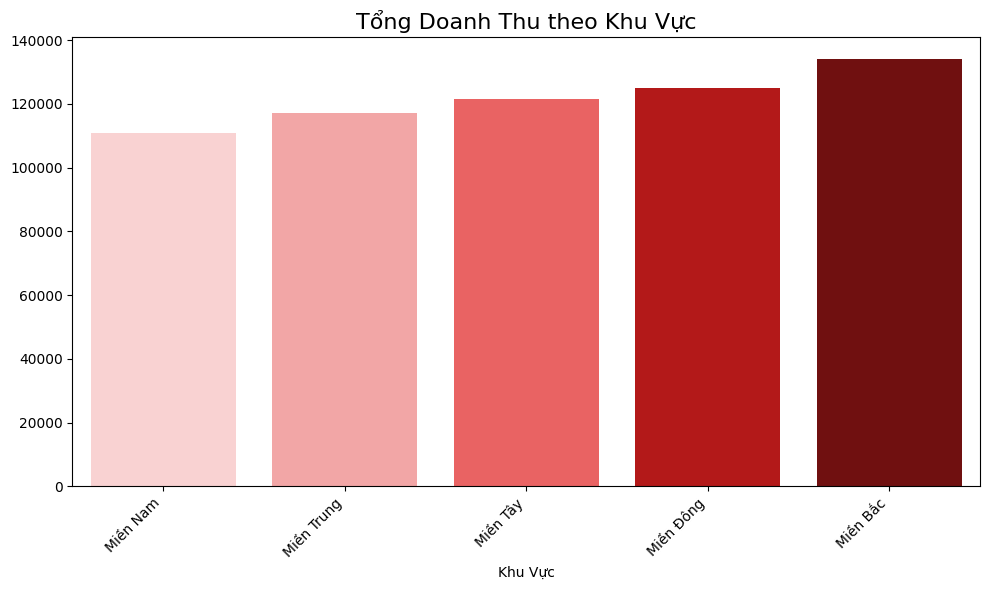

In [107]:
plt.figure(figsize=(10, 6))
colors = ['#ffcccc', '#ff9999', '#ff4d4d', '#cc0000', '#800000']
doanh_thu_khu_vuc = df.groupby('Khu Vực')['Doanh Thu'].sum().sort_values()
sns.barplot(x=doanh_thu_khu_vuc.index, y=doanh_thu_khu_vuc.values, palette=colors, hue=doanh_thu_khu_vuc.index, legend=False)
plt.title('Tổng Doanh Thu theo Khu Vực', fontsize=16)
plt.xlabel = 'Khu Vực'
plt.ylabel = 'Tổng Doanh Thu'
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Nhận xét

Từ biểu đồ tổng doanh thu theo khu vực ta có thể thấy miền Nam có doanh thu thấp nhất trong các khu vực, thấp hơn đáng kể so với các khu vực khác.
--> Ta hãy cùng phân tích sâu hơn về khu vực này

In [128]:
# Tính số lượng giao dịch (tần suất) theo khu vực
transaction_count = df.groupby('Khu Vực').size().rename('Số Giao Dịch')

# Tính giá trị trung bình mỗi đơn hàng theo khu vực
average_order_value = df.groupby('Khu Vực')['Doanh Thu'].mean().rename('Giá Trị TB Mỗi Đơn')

# Gộp thành 1 bảng tổng hợp
summary_table = pd.concat([transaction_count, average_order_value], axis=1).reset_index()

# Sắp xếp giảm dần theo số giao dịch (hoặc có thể theo giá trị trung bình)
summary_table = summary_table.sort_values(by='Số Giao Dịch', ascending=False)
summary_table.head()


,Khu Vực,Số Giao Dịch,Giá Trị TB Mỗi Đơn
2,Miền Trung,83,1410.746988
4,Miền Đông,83,1505.819277
0,Miền Bắc,82,1636.353659
1,Miền Nam,76,1459.618421
3,Miền Tây,75,1618.880000


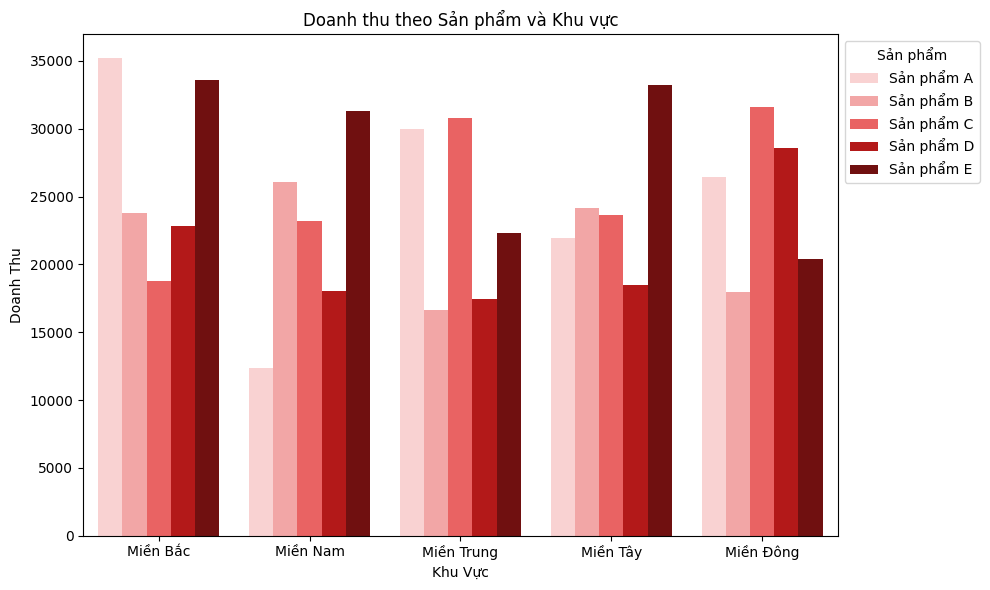

In [138]:
# Tính tổng doanh thu theo sản phẩm và khu vực
sales_item_by_region = df.groupby(['Sản Phẩm', 'Khu Vực'])['Doanh Thu'].sum().reset_index()

# Vẽ biểu đồ cột: sản phẩm theo khu vực
colors = ['#ffcccc', '#ff9999', '#ff4d4d', '#cc0000', '#800000']
plt.figure(figsize=(10, 6))
sns.barplot(data=sales_item_by_region, x='Khu Vực', y='Doanh Thu', hue='Sản Phẩm',palette=colors)
plt.title('Doanh thu theo Sản phẩm và Khu vực')
plt.xlabel='Khu Vực'
plt.ylabel='Doanh Thu'
plt.legend(title='Sản phẩm',)
plt.legend(title='Sản phẩm', loc='upper left', bbox_to_anchor=(1, 1)) 
plt.tight_layout()
plt.show()

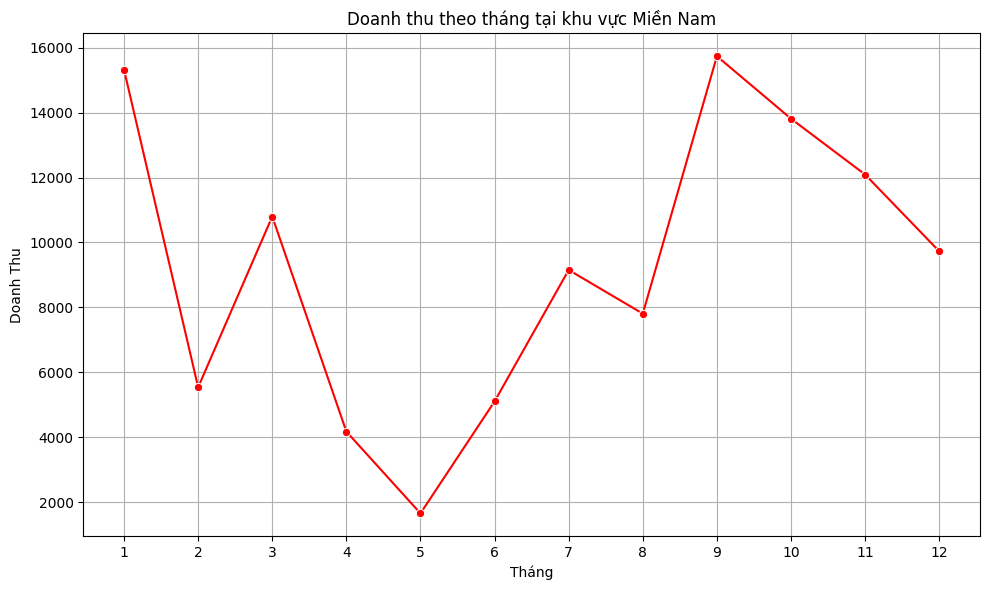

In [124]:
# Tính doanh thu theo tháng tại khu vực Miền Nam
south_monthly_sales = df[df['Khu Vực'] == 'Miền Nam'].groupby('Tháng')['Doanh Thu'].sum().reset_index()
plt.figure(figsize=(10,6))
sns.lineplot(data=south_monthly_sales, x='Tháng', y='Doanh Thu', marker='o', color='red')
plt.title('Doanh thu theo tháng tại khu vực Miền Nam')
plt.xlabel= 'Tháng' 
plt.ylabel= 'Doanh Thu'
plt.xticks(np.arange(1,13,1))
plt.grid(True)
plt.tight_layout()
plt.show()

<h2 style="color: crimson;">  Báo cáo Phân Tích Khu Vực Doanh Số Thấp Nhất</h2>

## 1. Tình hình hiện tại:
Dựa trên dữ liệu doanh số bán hàng, khu vực có doanh thu thấp nhất là **Miền Nam** với tổng doanh thu là **110,931**. Điều này đặt ra thách thức trong việc nâng cao hiệu quả kinh doanh tại khu vực này.

## 2. Phân tích nguyên nhân:
- Số lượng giao dịch tại Miền Nam là **76**, thấp hơn so với các vùng khác.
- Giá trị trung bình mỗi đơn hàng tại Miền Nam là **1,459**, thấp hơn **Miền Tây (1,618)** và **Miền Bắc (1,636)**.
- Doanh thu **Sản phẩm E** (sản phẩm chủ lực) tại Miền Nam thấp hơn rõ rệt so với các vùng khác.
- Doanh số tại Miền Nam **giảm mạnh vào tháng 5** và chỉ **tăng trở lại vào tháng 9**.

## 3. Giải pháp cụ thể:
- Đẩy mạnh phân phối và khuyến mãi **sản phẩm E** tại Miền Nam.
- Tăng cường hoạt động bán hàng vào **tháng 5–6** thông qua các chiến dịch kích cầu để duy trì doanh thu.
- Tổ chức chương trình **Khuyến mãi đặc biệt cho khu vực miền Nam** để thúc đẩy tần suất mua hàng.
- Tăng cường đào tạo đội ngũ bán hàng và cộng tác viên tại địa phương để thích ứng với văn hóa, phong tục, hành vi người tiêu dùng tại miền Nam.
- Tìm hiểu sâu thêm về đối thủ cạnh tranh, các yếu tố về 5 nguồn lực cạnh tranh (5Force) giúp nhận diện rõ hơn những yếu tố tác động đến doanh thu khu vực này.

## 4. Kết luận và khuyến nghị:
Miền Nam có tiềm năng phát triển doanh thu nếu được tập trung đúng **sản phẩm**, **thời điểm**, và **phương thức tiếp cận khách hàng**.